In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

Tissues = ['Whole Blood','Cells-Fibroblasts','Muscle Skeletal','Lung','Artery Tibial','Adipose Subcutaneous', 'Esophagus Mucosa']
regr='/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/LR_SummaryTest_Table.tsv'

#open files
R = pd.read_csv(regr, sep='\t')  ; X = R[["gene","chrom","str.start","eSTR_In_tissues"]]
#print(list(R.columns))

(2668, 38)
(2178, 38)
(490, 38)


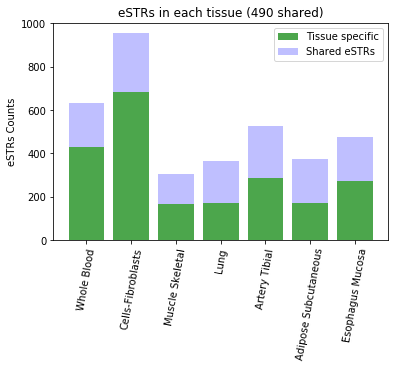

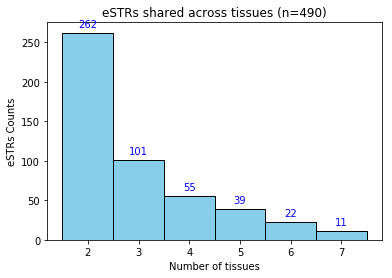

In [10]:
X=['Blood_eSTR?','Fibroblast_eSTR?','MuscleS_eSTR?','Lung_eSTR?','ArteryT_eSTR?','AdipSub_eSTR?','Esophagus_eSTR?']

R=R.loc[R['eSTR_In_tissues']>0]
print(R.shape)

U = R.loc[R['eSTR_In_tissues']==1]
Uniq = [U.loc[U[x]==1].shape[0] for x in X ]
print(U.shape)

Sh= R.loc[R['eSTR_In_tissues']>1]
tissueshared = [Sh.loc[Sh[x]==1].shape[0] for x in X ]
print(Sh.shape)

plt.figure()
bins=np.arange(2,9,1)
plt.bar([x for x in range(1,8,1)], Uniq, align='center', color='g' , alpha=0.7, label='Tissue specific')
plt.bar([x for x in range(1,8,1)], tissueshared, bottom=Uniq, color='b',label='Shared eSTRs', align='center', alpha=0.25)
#plt.xlabel('Tissues')
plt.ylabel('eSTRs Counts')
plt.title('eSTRs in each tissue (490 shared)')
plt.xticks([x for x in range(1,8,1)],Tissues, rotation=80)
plt.legend(loc='upper right')
plt.show()

ax = Sh['eSTR_In_tissues'].plot(kind='hist', bins=bins, align='left',ec='black',color = "skyblue")
rects = ax.patches
labels = [str(Sh.loc[Sh['eSTR_In_tissues']==x].shape[0]) for x in bins[:7]]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom',color = "blue")
plt.xlabel('Number of tissues')
plt.ylabel('eSTRs Counts')
plt.title('eSTRs shared across tissues (n=490)')
plt.show()

#WB=R.loc[(R['eSTR_In_tissues']==1)&(R['Blood_eSTR?']==1)]


In [102]:
for i in range(len(tissueshared)):
    print (Tissues[i],'=>',tissueshared[i])

Whole Blood => 202
Cells-Fibroblasts => 272
Muscle Skeletal => 137
Lung => 194
Artery Tibial => 239
Adipose Subcutaneous => 203
Esophagus Mucosa => 204
